# TODO: 有问题

In [1]:
%load_ext autoreload
%autoreload 2

import os
import json
import pickle
import jsonlines
import pandas as pd
from collections import defaultdict
import shutil
from tqdm import tqdm


In [2]:
# 相关性文件路径
RELEVANCE_FILE = '/Users/song/Downloads/nq/qrels/test.tsv'

# 排序文件路径
RANK_FILE = '/Users/song/Downloads/beir/nq/rank.tsv'

In [22]:
# 使用pandas读取相关性文件(.tsv)
rel_df = pd.read_csv(RELEVANCE_FILE, sep='\t', header=0)
rel_df.head()
# 转成字典{query_id: {corpus_id: relevance}}
ref_dict = defaultdict(dict)
for i, row in rel_df.iterrows():
    ref_dict[row['query-id']][row['corpus-id']] = row['score']

In [29]:
# 使用pandas读取排序文件
rank_df = pd.read_csv(RANK_FILE, sep='\t', header=None, names=['query-id', 'corpus-id', 'score'])
rank_df

,query-id,corpus-id,score
0,test291,doc515250,1.710614
1,test291,doc515229,1.701058
2,test291,doc10943,1.677855
3,test291,doc521311,1.666365
4,test291,doc515254,1.665312
...,...,...,...
3451995,test1028,doc1954370,1.008903
3451996,test1028,doc1784450,1.008894
3451997,test1028,doc635552,1.008881
3451998,test1028,doc170128,1.008880


In [30]:
# rank_df每个query-id只保留前100个
rank_df_100 = rank_df.groupby('query-id').head(1000)
rank_df_100.reset_index(drop=True, inplace=True)
rank_df_100

,query-id,corpus-id,score
0,test291,doc515250,1.710614
1,test291,doc515229,1.701058
2,test291,doc10943,1.677855
3,test291,doc521311,1.666365
4,test291,doc515254,1.665312
...,...,...,...
3451995,test1028,doc1954370,1.008903
3451996,test1028,doc1784450,1.008894
3451997,test1028,doc635552,1.008881
3451998,test1028,doc170128,1.008880


In [31]:
# 统计rank_df_100中每个query-id中最早相关的corpus-id是第几个，即rank_df_100中的排序，并进行可视化
rel_rank = defaultdict(list)
for query_id, group in rank_df_100.groupby('query-id'):
    for i, row in group.iterrows():
        corpus_id = row['corpus-id']
        rel_rank[query_id].append(1001)
        if corpus_id in ref_dict[query_id]:
            rel_rank[query_id].append(i + 1)

# 只保留rel_rank[query_id]中最小的值
rel_rank_min = {query_id: min(rank)
                for query_id, rank in rel_rank.items()}
rel_rank_min

{'test0': 1001,
 'test1': 1001,
 'test10': 1001,
 'test100': 1001,
 'test1000': 1001,
 'test1001': 1001,
 'test1002': 1001,
 'test1003': 1001,
 'test1004': 1001,
 'test1005': 1001,
 'test1006': 1001,
 'test1007': 1001,
 'test1008': 1001,
 'test1009': 1001,
 'test101': 1001,
 'test1010': 1001,
 'test1011': 1001,
 'test1012': 1001,
 'test1013': 1001,
 'test1014': 1001,
 'test1015': 1001,
 'test1016': 1001,
 'test1017': 1001,
 'test1018': 1001,
 'test1019': 1001,
 'test102': 1001,
 'test1020': 1001,
 'test1021': 1001,
 'test1022': 1001,
 'test1023': 1001,
 'test1024': 1001,
 'test1025': 1001,
 'test1026': 1001,
 'test1027': 1001,
 'test1028': 1001,
 'test1029': 1001,
 'test103': 1001,
 'test1030': 1001,
 'test1031': 1001,
 'test1032': 1001,
 'test1033': 1001,
 'test1034': 1001,
 'test1035': 1001,
 'test1036': 1001,
 'test1037': 1001,
 'test1038': 1001,
 'test1039': 1001,
 'test104': 1001,
 'test1040': 1001,
 'test1041': 1001,
 'test1042': 1001,
 'test1043': 1001,
 'test1044': 1001,
 'test

<Axes: >

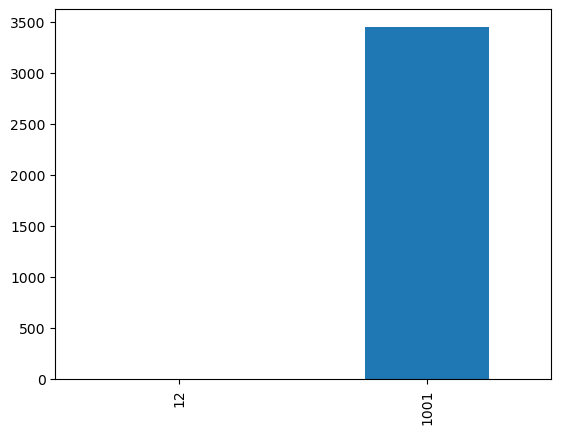

In [32]:
rel_rank_min.values()
# 查看相关性最早的corpus-id在rank_df_100中的排序分布
pd.Series(rel_rank_min.values()).value_counts().sort_index().plot.bar()